In [ ]:
#importing libraries
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#input data
train_df = pd.read_csv("/content/drive/MyDrive/Artifical intelligence/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Artifical intelligence/train.csv")
test_PassengerId = test_df["PassengerId"]

In [ ]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Univariate Variable Analysis

In [ ]:
 #Categorical Variable

In [ ]:
 def bar_plot(variable):
    """
    input: variable ex: "Sex"
    output: bar plot & value count
    """
    # get feature
    var = train_df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable, varValue))

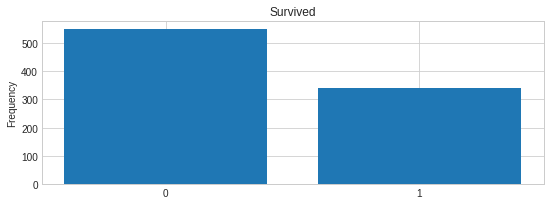

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


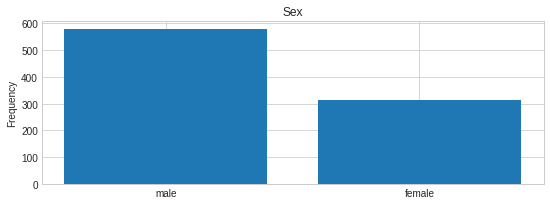

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


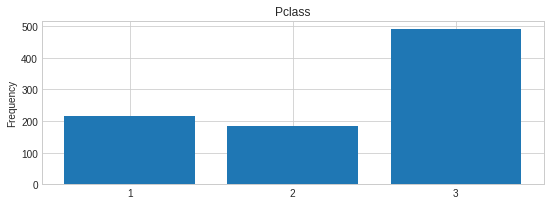

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


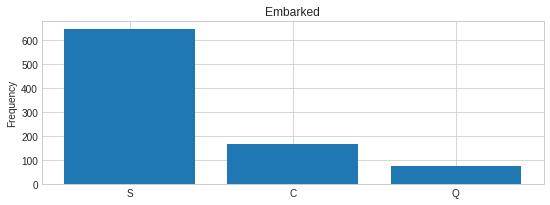

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


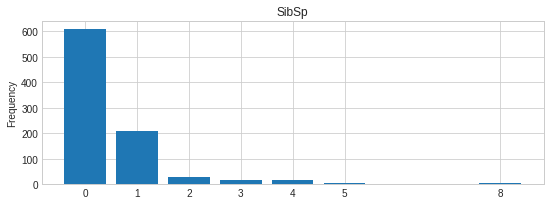

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


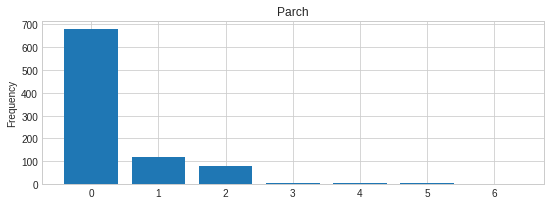

Parch: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [ ]:
category1 = ["Survived", "Sex", "Pclass","Embarked", "SibSp", "Parch"]
for c in category1:
    bar_plot(c)

In [ ]:
category2 = ["Cabin","Name","Ticket"]
for c in category2:
    print("{} \n".format(train_df[c].value_counts()))

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64 

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64 

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64 



In [ ]:
#Numerical variable

In [ ]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

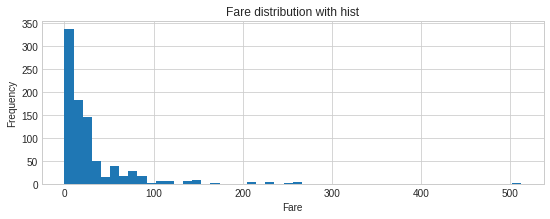

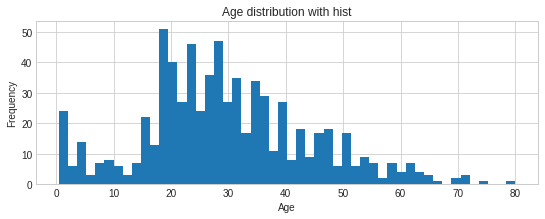

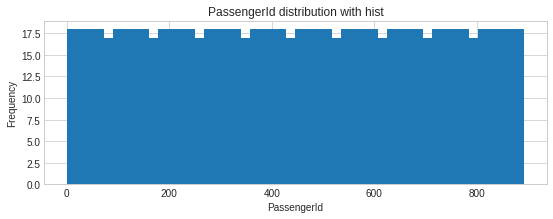

In [ ]:
numericalVar = ["Fare","Age","PassengerId"]
for n in numericalVar:
    plot_hist(n)

In [ ]:
#data comparison

In [ ]:
# Pclass vs Survived
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
# Sex vs Survived
train_df[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
# Sibsp vs Survived
train_df[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
# Parch vs Survived
train_df[["Parch","Survived"]].groupby(["Parch"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [ ]:
#Checking Outlier

In [ ]:
def detect_outliers(df,features):
    outlier_indexes = []
    
    for c in features:
        # 1 st quartile
        Q1 = np.percentile(df[c],25)
        # 3 rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indexes
        outlier_list_col = df[(df[c]< Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indexes
        outlier_indexes.extend(outlier_list_col)
        
    outlier_indexes = Counter(outlier_indexes)
    multiple_outliers = list(i for i, v in outlier_indexes.items() if v > 2)
    
    return multiple_outliers

In [ ]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [ ]:
# drop outliers
train_df = train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop = True)

In [ ]:
train_df_len = len(train_df)
train_df = pd.concat([train_df,test_df], axis=0).reset_index(drop=True)

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#checking missing values

In [ ]:
train_df.columns[train_df.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [ ]:
train_df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             347
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1367
Embarked          4
dtype: int64

In [ ]:
#filling missing values
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN
942,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
1710,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")

In [ ]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
(train_df[train_df["Pclass"] == 3]["Fare"]).mean()

13.274400205128204

In [ ]:
train_df["Fare"] = train_df["Fare"].fillna((train_df[train_df["Pclass"] == 3]["Fare"]).mean())

In [ ]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
#corelating

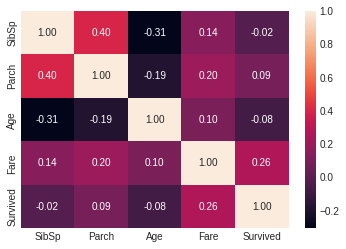

In [ ]:
list1 = ["SibSp","Parch","Age","Fare","Survived"]
sns.heatmap(train_df[list1].corr(), annot=True, fmt=".2f")
plt.show()

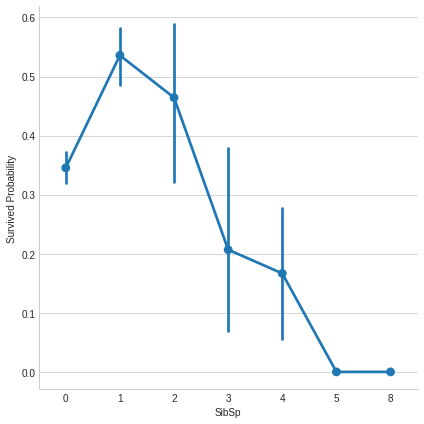

In [ ]:
# SibSp and Survived
g = sns.factorplot(x="SibSp", y="Survived", data = train_df, king = "bar",size = 6)
g.set_ylabels("Survived Probability")
plt.show()

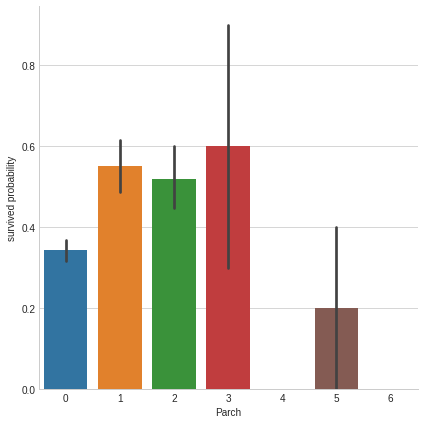

In [ ]:
#Parch and Survived
g = sns.factorplot(x="Parch", y="Survived",kind="bar",data=train_df,size=6)
g.set_ylabels("survived probability")
plt.show()

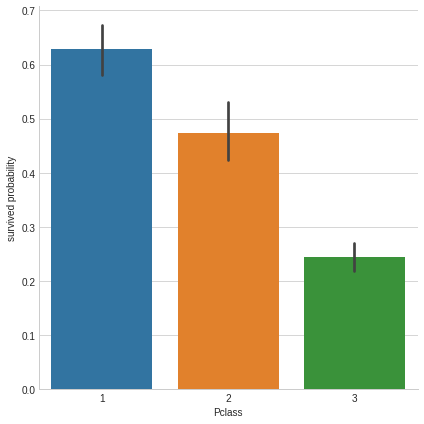

In [ ]:
#Pclass and Survived
g = sns.factorplot(x="Pclass",y="Survived",data=train_df, kind="bar", size=6)
g.set_ylabels("survived probability")
plt.show()

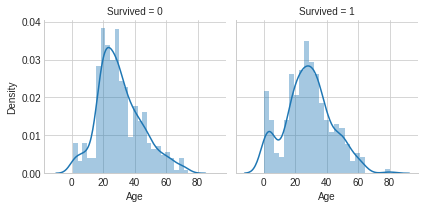

In [ ]:
# Age and Survived
g = sns.FacetGrid(train_df, col="Survived")
g.map(sns.distplot, "Age", bins=25)
plt.show()

In [ ]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1740,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
1744,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
1749,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
1759,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


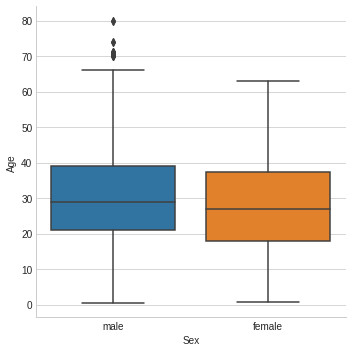

In [ ]:
sns.factorplot(x="Sex",y="Age",data=train_df, kind="box")
plt.show()

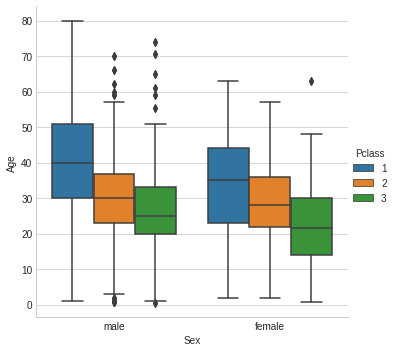

In [ ]:
sns.factorplot(x="Sex",y="Age",hue="Pclass", data=train_df, kind="box")
plt.show()

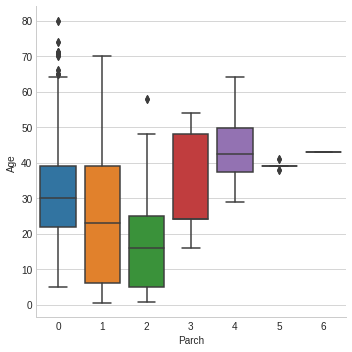

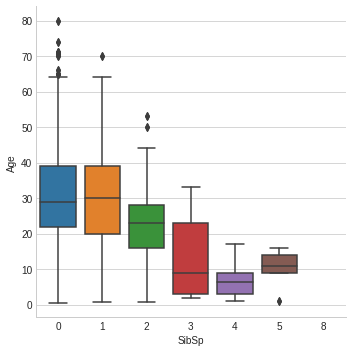

In [ ]:
sns.factorplot(x="Parch",y="Age", data=train_df, kind="box")
sns.factorplot(x="SibSp", y="Age", data=train_df, kind="box")
plt.show()

In [ ]:
train_df["Sex"] = [1 if i == "male" else 0 for i in train_df["Sex"]]

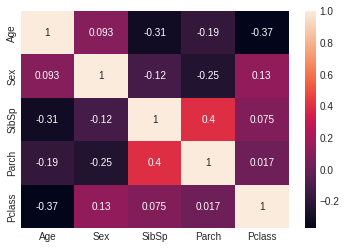

In [ ]:
sns.heatmap(train_df[["Age","Sex","SibSp","Parch","Pclass"]].corr(), annot=True)
plt.show()

In [ ]:
#age
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) & (train_df["Parch"] == train_df.iloc[i]["Pclass"]))].median()
    age_med = train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med

In [ ]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
#age
train_df["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [ ]:
name = train_df["Name"]
train_df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]

In [ ]:
train_df["Title"].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

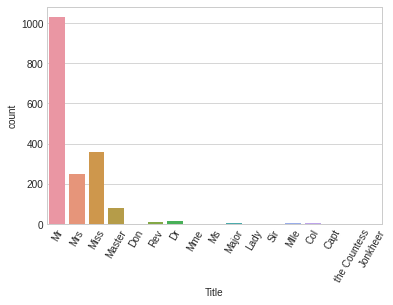

In [ ]:
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show() 

In [ ]:
# convert to categorical
train_df["Title"] = train_df["Title"].replace(["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"other")
train_df["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in train_df["Title"]]
train_df["Title"].head(20)

0     2
1     1
2     1
3     1
4     2
5     2
6     2
7     0
8     1
9     1
10    1
11    1
12    2
13    2
14    1
15    1
16    0
17    2
18    1
19    1
Name: Title, dtype: int64

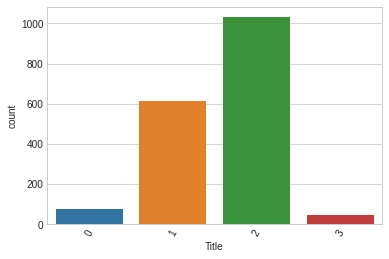

In [ ]:
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

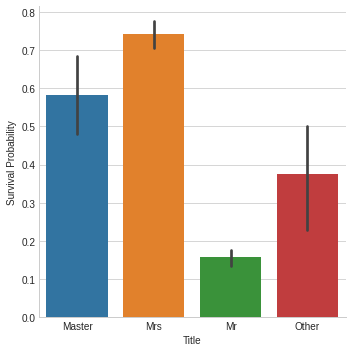

In [ ]:
g = sns.factorplot(x = "Title", y = "Survived", data = train_df, kind = "bar")
g.set_xticklabels(["Master","Mrs","Mr","Other"])
g.set_ylabels("Survival Probability")
plt.show()

In [ ]:
train_df.drop(labels = ["Name"], axis = 1, inplace = True)

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S,2


In [ ]:
train_df = pd.get_dummies(train_df,columns=["Title"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


In [ ]:
#family
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


In [ ]:
train_df["Fsize"] = train_df["SibSp"] + train_df["Parch"] + 1

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1


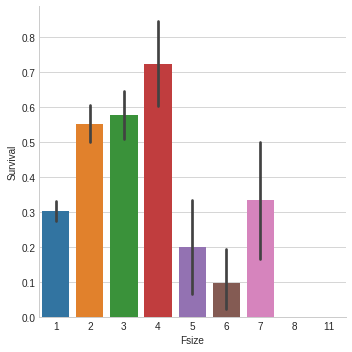

In [ ]:
g = sns.factorplot(x = "Fsize", y="Survived", data = train_df, kind="bar")
g.set_ylabels("Survival")
plt.show()

In [ ]:
train_df["family_size"] = [1 if i < 5 else 0 for i in train_df["Fsize"]]

In [ ]:
train_df.head(15)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,1
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,1
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,1
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,1
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,1
5,6,0,3,1,24.0,0,0,330877,8.4583,NaN,Q,0,0,1,0,1,1
6,7,0,1,1,54.0,0,0,17463,51.8625,E46,S,0,0,1,0,1,1
7,8,0,3,1,2.0,3,1,349909,21.0750,NaN,S,1,0,0,0,5,0
8,9,1,3,0,27.0,0,2,347742,11.1333,NaN,S,0,1,0,0,3,1
9,10,1,2,0,14.0,1,0,237736,30.0708,NaN,C,0,1,0,0,2,1


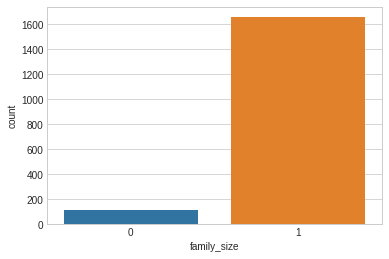

In [ ]:
sns.countplot(x = "family_size", data=train_df)
plt.show()

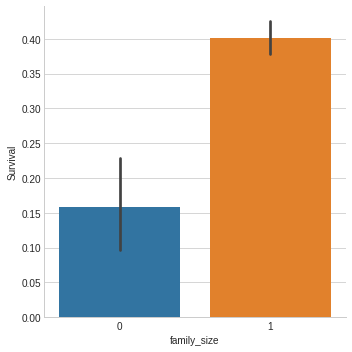

In [ ]:
g = sns.factorplot(x = "family_size", y= "Survived", data = train_df, kind = "bar")
g.set_ylabels("Survival")
plt.show()

In [ ]:
train_df = pd.get_dummies(train_df, columns = ["family_size"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,0,1
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,0,1
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,0,1
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,0,1
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,0,1


In [ ]:
#embarked
train_df["Embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

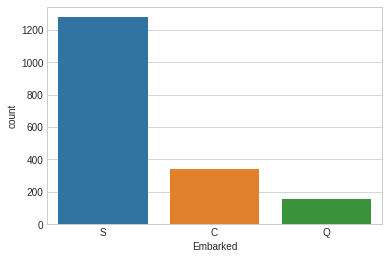

In [ ]:
sns.countplot(x="Embarked", data=train_df)
plt.show()

In [ ]:
train_df = pd.get_dummies(train_df, columns=["Embarked"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,2,0,1,0,0,1
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,2,0,1,1,0,0
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,1,0,1,0,0,1
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,0,1,0,0,2,0,1,0,0,1
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,1,0,0,1


In [ ]:
#ticket
train_df["Ticket"].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

In [ ]:
a = "A/5. 2151"
a.replace(".","").replace("/","").strip().split(" ")[0]

'A5'

In [ ]:
tickets = []
for i in list(train_df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")
train_df["Ticket"] = tickets

In [ ]:
train_df["Ticket"].head(15)

0         A5
1         PC
2     STONO2
3          x
4          x
5          x
6          x
7          x
8          x
9          x
10        PP
11         x
12        A5
13         x
14         x
Name: Ticket, dtype: object

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,A5,7.2500,NaN,0,0,1,0,2,0,1,0,0,1
1,2,1,1,0,38.0,1,0,PC,71.2833,C85,0,1,0,0,2,0,1,1,0,0
2,3,1,3,0,26.0,0,0,STONO2,7.9250,NaN,0,1,0,0,1,0,1,0,0,1
3,4,1,1,0,35.0,1,0,x,53.1000,C123,0,1,0,0,2,0,1,0,0,1
4,5,0,3,1,35.0,0,0,x,8.0500,NaN,0,0,1,0,1,0,1,0,0,1


In [ ]:
train_df = pd.get_dummies(train_df, columns = ["Ticket"], prefix = "T")
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,...,T_SOPP,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_x
0,1,0,3,1,22.0,1,0,7.2500,NaN,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,38.0,1,0,71.2833,C85,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,0,26.0,0,0,7.9250,NaN,0,...,0,0,0,0,0,1,0,0,0,0
3,4,1,1,0,35.0,1,0,53.1000,C123,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,1,35.0,0,0,8.0500,NaN,0,...,0,0,0,0,0,0,0,0,0,1
5,6,0,3,1,24.0,0,0,8.4583,NaN,0,...,0,0,0,0,0,0,0,0,0,1
6,7,0,1,1,54.0,0,0,51.8625,E46,0,...,0,0,0,0,0,0,0,0,0,1
7,8,0,3,1,2.0,3,1,21.0750,NaN,1,...,0,0,0,0,0,0,0,0,0,1
8,9,1,3,0,27.0,0,2,11.1333,NaN,0,...,0,0,0,0,0,0,0,0,0,1
9,10,1,2,0,14.0,1,0,30.0708,NaN,0,...,0,0,0,0,0,0,0,0,0,1


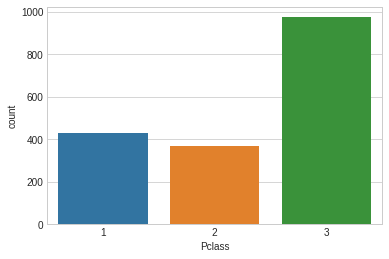

In [ ]:
#Pclass
sns.countplot(x="Pclass", data = train_df)
plt.show()

In [ ]:
train_df["Pclass"] == train_df["Pclass"].astype("category")
train_df = pd.get_dummies(train_df, columns = ["Pclass"])
train_df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,...,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,1,0,1,22.0,1,0,7.2500,NaN,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,0,38.0,1,0,71.2833,C85,0,1,...,0,0,0,0,0,0,0,1,0,0
2,3,1,0,26.0,0,0,7.9250,NaN,0,1,...,0,0,1,0,0,0,0,0,0,1
3,4,1,0,35.0,1,0,53.1000,C123,0,1,...,0,0,0,0,0,0,1,1,0,0
4,5,0,1,35.0,0,0,8.0500,NaN,0,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
#sex
train_df["Sex"] = train_df["Sex"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Sex"])
train_df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,Title_2,...,T_STONO2,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
0,1,0,22.0,1,0,7.2500,NaN,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,2,1,38.0,1,0,71.2833,C85,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,3,1,26.0,0,0,7.9250,NaN,0,1,0,...,1,0,0,0,0,0,0,1,1,0
3,4,1,35.0,1,0,53.1000,C123,0,1,0,...,0,0,0,0,1,1,0,0,1,0
4,5,0,35.0,0,0,8.0500,NaN,0,0,1,...,0,0,0,0,1,0,0,1,0,1


In [ ]:
#removing
train_df.drop(labels = ["PassengerId", "Cabin"],axis = 1, inplace=True)

In [ ]:
train_df.head()

,Survived,Age,SibSp,Parch,Fare,Title_0,Title_1,Title_2,Title_3,Fsize,...,T_STONO2,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
0,0,22.0,1,0,7.2500,0,0,1,0,2,...,0,0,0,0,0,0,0,1,0,1
1,1,38.0,1,0,71.2833,0,1,0,0,2,...,0,0,0,0,0,1,0,0,1,0
2,1,26.0,0,0,7.9250,0,1,0,0,1,...,1,0,0,0,0,0,0,1,1,0
3,1,35.0,1,0,53.1000,0,1,0,0,2,...,0,0,0,0,1,1,0,0,1,0
4,0,35.0,0,0,8.0500,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,1


In [ ]:
#modelling
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
train_df.head()

,Survived,Age,SibSp,Parch,Fare,Title_0,Title_1,Title_2,Title_3,Fsize,...,T_STONO2,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
0,0,22.0,1,0,7.2500,0,0,1,0,2,...,0,0,0,0,0,0,0,1,0,1
1,1,38.0,1,0,71.2833,0,1,0,0,2,...,0,0,0,0,0,1,0,0,1,0
2,1,26.0,0,0,7.9250,0,1,0,0,1,...,1,0,0,0,0,0,0,1,1,0
3,1,35.0,1,0,53.1000,0,1,0,0,2,...,0,0,0,0,1,1,0,0,1,0
4,0,35.0,0,0,8.0500,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,1


In [ ]:
test = train_df[train_df_len:]
test.drop(labels = ["Survived"], axis = 1, inplace = True)

In [ ]:
test.head()

,Age,SibSp,Parch,Fare,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,...,T_STONO2,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
881,22.0,1,0,7.2500,0,0,1,0,2,0,...,0,0,0,0,0,0,0,1,0,1
882,38.0,1,0,71.2833,0,1,0,0,2,0,...,0,0,0,0,0,1,0,0,1,0
883,26.0,0,0,7.9250,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
884,35.0,1,0,53.1000,0,1,0,0,2,0,...,0,0,0,0,1,1,0,0,1,0
885,35.0,0,0,8.0500,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1


In [ ]:
train = train_df[:train_df_len]
x_train = train.drop(labels = "Survived", axis = 1)
y_train = train["Survived"]
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.33, random_state = 42)
print("x_train",len(x_train))
print("x_test",len(x_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(test))

x_train 590
x_test 291
y_train 590
y_test 291
test 891


In [ ]:
#logistic regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
acc_log_train = round(logreg.score(x_train, y_train)*100,2)
acc_log_test = round(logreg.score(x_test,y_test)*100,2)

print("Training accuracy: % {}".format(acc_log_train))
print("Testing accuracy: % {}".format(acc_log_test))

Training accuracy: % 82.54
Testing accuracy: % 82.13


In [ ]:
#classifier
random_state = 42
classifier = [
    DecisionTreeClassifier(random_state = random_state),
    SVC(random_state = random_state),
    RandomForestClassifier(random_state = random_state),
    LogisticRegression(random_state = random_state),
    KNeighborsClassifier()
    
]

In [ ]:
dt_param_grid = {"min_samples_split": range(10,500,20),
                "max_depth": range(1,20,2)}
svc_param_grid = {"kernel": ["rbf"],
                 "gamma": [0.001,0.01,0.1,1],
                 "C": [1,10,50,100,200,300,1000]}
rf_param_grid ={"max_features": [1,3,10],
               "min_samples_split": [2,3,10],
               "min_samples_leaf": [1,3,10],
               "bootstrap": [False],
               "n_estimators": [100,300],
               "criterion": ["gini"]}
logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}
knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric": ["euclidean","manhattan"]}
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]
        

In [ ]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid = classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1, verbose = 1)
    clf.fit(x_train, y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.8355932203389831
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.7983050847457627
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.8440677966101695
Fitting 10 folds for each of 14 candidates, totalling 140 fits
0.8152542372881356
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.7813559322033898


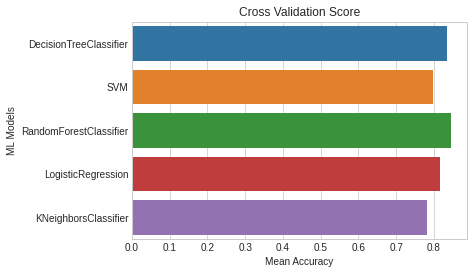

In [ ]:
cv_results = pd.DataFrame({"Cross Validation Means": cv_result,
                          "ML Models": ["DecisionTreeClassifier",
                                        "SVM","RandomForestClassifier",
                                        "LogisticRegression",
                                        "KNeighborsClassifier"]})

g = sns.barplot("Cross Validation Means","ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Score")
plt.show()


In [ ]:
#essembling
votingC = VotingClassifier(estimators = [("dt", best_estimators[0]),
                                        ("rcf", best_estimators[2]),
                                        ("lr", best_estimators[3])],
                          voting = "soft", n_jobs = -1)
votingC = votingC.fit(x_train, y_train)
print(accuracy_score(votingC.predict(x_test), y_test))

0.8213058419243986


In [ ]:
test_survived = pd.Series(votingC.predict(test), name = "Survived").astype(int)
results = pd.concat([test_PassengerId, test_survived], axis = 1)

In [ ]:
results.sample(10)

,PassengerId,Survived
794,795,0
7,8,0
496,497,1
60,61,0
16,17,0
523,524,1
167,168,0
682,683,0
814,815,0
594,595,0
